In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Stock symbols
stocks = ["AGI.NS", "DABUR.NS", "DRREDDY.NS", "HINDUNILVR.NS", "NESTLEIND.NS", "SUNPHARMA.NS","GLAXO.NS"]

# Create a DataFrame for each stock
df_agi = yf.Ticker("AGI.NS").history(period="max")
df_dabur = yf.Ticker("DABUR.NS").history(period="max")
df_drreddy = yf.Ticker("DRREDDY.NS").history(period="max")
df_hindunilvr = yf.Ticker("HINDUNILVR.NS").history(period="max")
df_nestleind = yf.Ticker("NESTLEIND.NS").history(period="max")
df_sunpharma = yf.Ticker("SUNPHARMA.NS").history(period="max")


In [3]:
# Assuming df_agi, df_dabur, ..., df_sunpharma are your dataframes

# Extracting the first and last index from each DataFrame
start_dates = [df.index[0] for df in [df_agi, df_dabur, df_drreddy, df_hindunilvr, df_nestleind, df_sunpharma]]
end_dates = [df.index[-1] for df in [df_agi, df_dabur, df_drreddy, df_hindunilvr, df_nestleind, df_sunpharma]]

# Finding the latest start date and the earliest end date
latest_start_date = max(start_dates)
earliest_end_date = min(end_dates)

print(f"Latest common start date: {latest_start_date}")
print(f"Earliest common end date: {earliest_end_date}")


Latest common start date: 2002-08-12 00:00:00+05:30
Earliest common end date: 2023-12-21 00:00:00+05:30


In [4]:
# Assuming df_agi, df_dabur, ..., df_sunpharma are your dataframes
# Assuming latest_start_date and earliest_end_date are already defined as shown

# Filter each DataFrame for the common date range
df_agi_filtered = df_agi.loc[latest_start_date:earliest_end_date]
df_dabur_filtered = df_dabur.loc[latest_start_date:earliest_end_date]
df_drreddy_filtered = df_drreddy.loc[latest_start_date:earliest_end_date]
df_hindunilvr_filtered = df_hindunilvr.loc[latest_start_date:earliest_end_date]
df_nestleind_filtered = df_nestleind.loc[latest_start_date:earliest_end_date]
df_sunpharma_filtered = df_sunpharma.loc[latest_start_date:earliest_end_date]

# Now, each of these filtered DataFrames contains data only within the common date range.


In [5]:
# Renaming columns for merging
df_agi_filtered.columns = [f"AGI_{col}" for col in df_agi_filtered.columns]
df_dabur_filtered.columns = [f"DABUR_{col}" for col in df_dabur_filtered.columns]
df_drreddy_filtered.columns = [f"DRREDDY_{col}" for col in df_drreddy_filtered.columns]
df_hindunilvr_filtered.columns = [f"HINDUNILVR_{col}" for col in df_hindunilvr_filtered.columns]
df_nestleind_filtered.columns = [f"NESTLEIND_{col}" for col in df_nestleind_filtered.columns]
df_sunpharma_filtered.columns = [f"SUNPHARMA_{col}" for col in df_sunpharma_filtered.columns]

# Merging all dataframes on the Date index
merged_df = pd.concat([df_agi_filtered, df_dabur_filtered, df_drreddy_filtered, 
                       df_hindunilvr_filtered, df_nestleind_filtered, df_sunpharma_filtered], axis=1)

merged_df.head()  # Displaying the first few rows of the merged dataframe



,AGI_Open,AGI_High,AGI_Low,AGI_Close,AGI_Volume,AGI_Dividends,AGI_Stock Splits,DABUR_Open,DABUR_High,DABUR_Low,...,NESTLEIND_Volume,NESTLEIND_Dividends,NESTLEIND_Stock Splits,SUNPHARMA_Open,SUNPHARMA_High,SUNPHARMA_Low,SUNPHARMA_Close,SUNPHARMA_Volume,SUNPHARMA_Dividends,SUNPHARMA_Stock Splits
Date,,,,,,,,,,,,,,,,,,,,,
2002-08-12 00:00:00+05:30,0.058234,0.059599,0.056301,0.056756,4345,0.0,0.0,6.077694,6.107763,5.968694,...,7100,0.0,0.0,10.881411,11.030199,10.718735,10.835782,301319,0.0,0.0
2002-08-13 00:00:00+05:30,0.057097,0.059826,0.057097,0.058575,550,0.0,0.0,6.002522,6.239316,5.968695,...,8800,0.0,0.0,10.754442,10.945884,10.754442,10.832805,274768,0.0,0.0
2002-08-14 00:00:00+05:30,0.058917,0.058917,0.057324,0.058689,814,0.0,0.0,6.013797,6.137832,6.013797,...,18700,0.0,0.0,10.653269,11.010362,10.653269,10.900258,299211,0.0,0.0
2002-08-15 00:00:00+05:30,0.058689,0.058689,0.058689,0.058689,0,0.0,0.0,6.081452,6.081452,6.081452,...,0,0.0,0.0,10.900258,10.900258,10.900258,10.900258,0,0.0,0.0
2002-08-16 00:00:00+05:30,0.058803,0.058803,0.058120,0.058120,2897,0.0,0.0,6.062659,6.137832,6.025074,...,9400,0.0,0.0,10.990523,11.109554,10.812969,11.040119,378650,0.0,0.0


In [6]:
merged_df.columns

Index(['AGI_Open', 'AGI_High', 'AGI_Low', 'AGI_Close', 'AGI_Volume',
       'AGI_Dividends', 'AGI_Stock Splits', 'DABUR_Open', 'DABUR_High',
       'DABUR_Low', 'DABUR_Close', 'DABUR_Volume', 'DABUR_Dividends',
       'DABUR_Stock Splits', 'DRREDDY_Open', 'DRREDDY_High', 'DRREDDY_Low',
       'DRREDDY_Close', 'DRREDDY_Volume', 'DRREDDY_Dividends',
       'DRREDDY_Stock Splits', 'HINDUNILVR_Open', 'HINDUNILVR_High',
       'HINDUNILVR_Low', 'HINDUNILVR_Close', 'HINDUNILVR_Volume',
       'HINDUNILVR_Dividends', 'HINDUNILVR_Stock Splits', 'NESTLEIND_Open',
       'NESTLEIND_High', 'NESTLEIND_Low', 'NESTLEIND_Close',
       'NESTLEIND_Volume', 'NESTLEIND_Dividends', 'NESTLEIND_Stock Splits',
       'SUNPHARMA_Open', 'SUNPHARMA_High', 'SUNPHARMA_Low', 'SUNPHARMA_Close',
       'SUNPHARMA_Volume', 'SUNPHARMA_Dividends', 'SUNPHARMA_Stock Splits'],
      dtype='object')

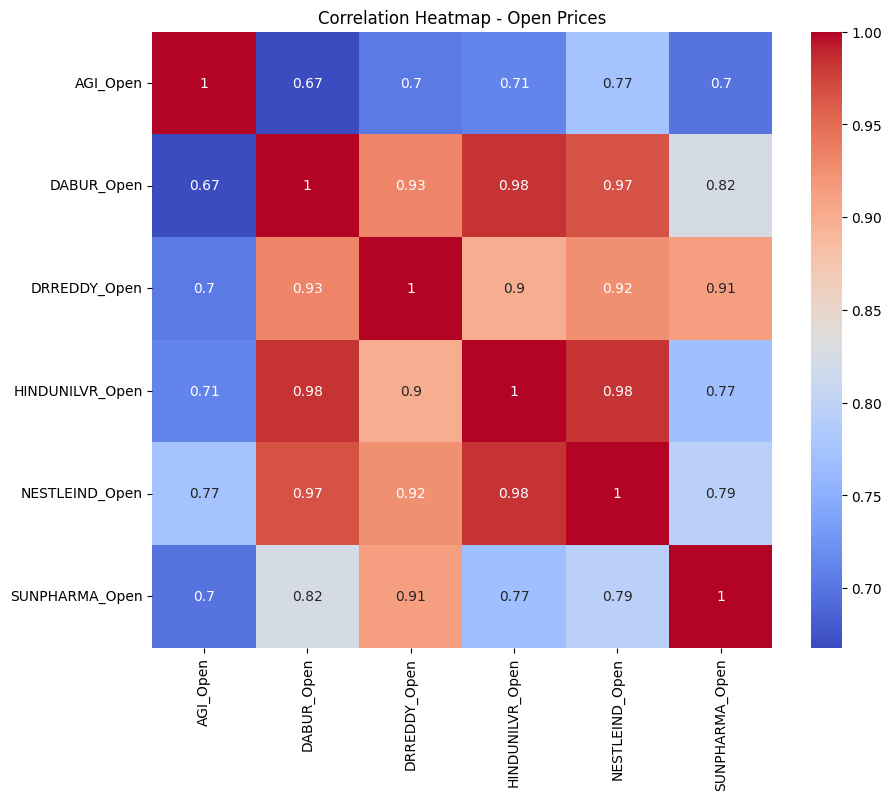

In [7]:
# Filter Open columns
open_cols = [col for col in merged_df.columns if 'Open' in col]
df_open = merged_df[open_cols]

# Calculate correlation
corr_open = df_open.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_open, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Open Prices')
plt.show()


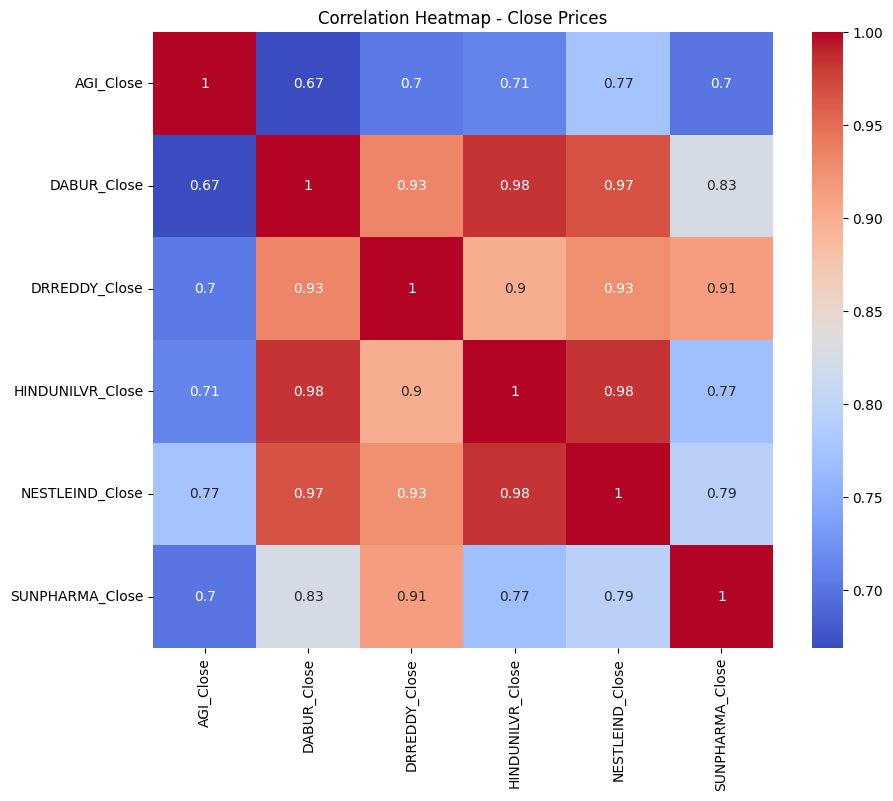

In [8]:
# Filter Close columns
close_cols = [col for col in merged_df.columns if 'Close' in col]
df_close = merged_df[close_cols]

# Calculate correlation
corr_close = df_close.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_close, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Close Prices')
plt.show()


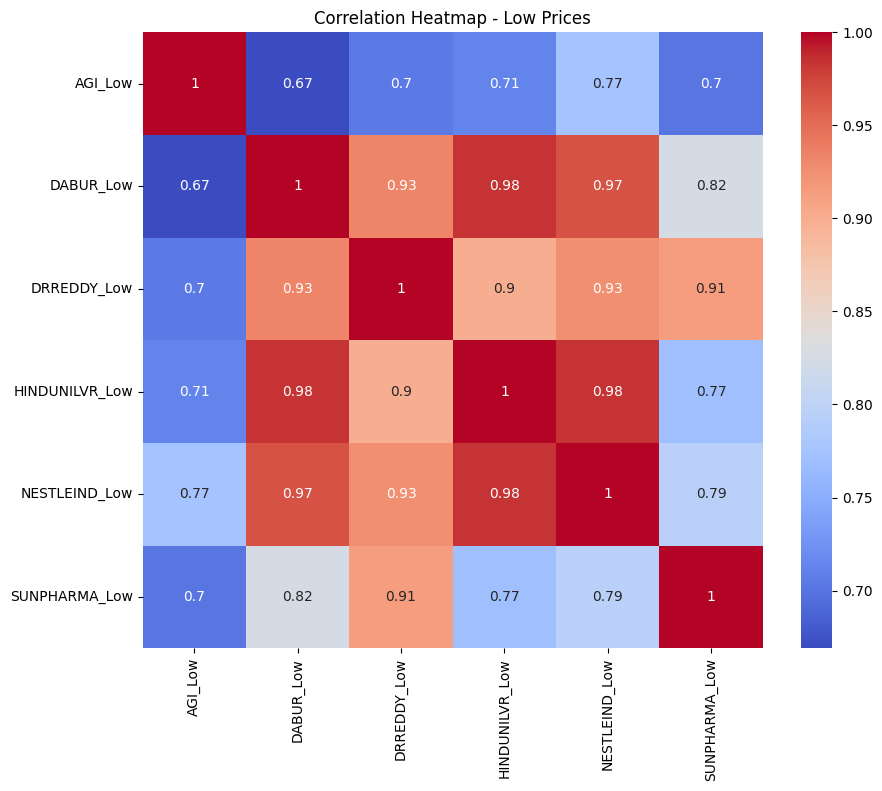

In [9]:
# Filter Low columns
low_cols = [col for col in merged_df.columns if 'Low' in col]
df_low = merged_df[low_cols]

# Calculate correlation
corr_low = df_low.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_low, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Low Prices')
plt.show()


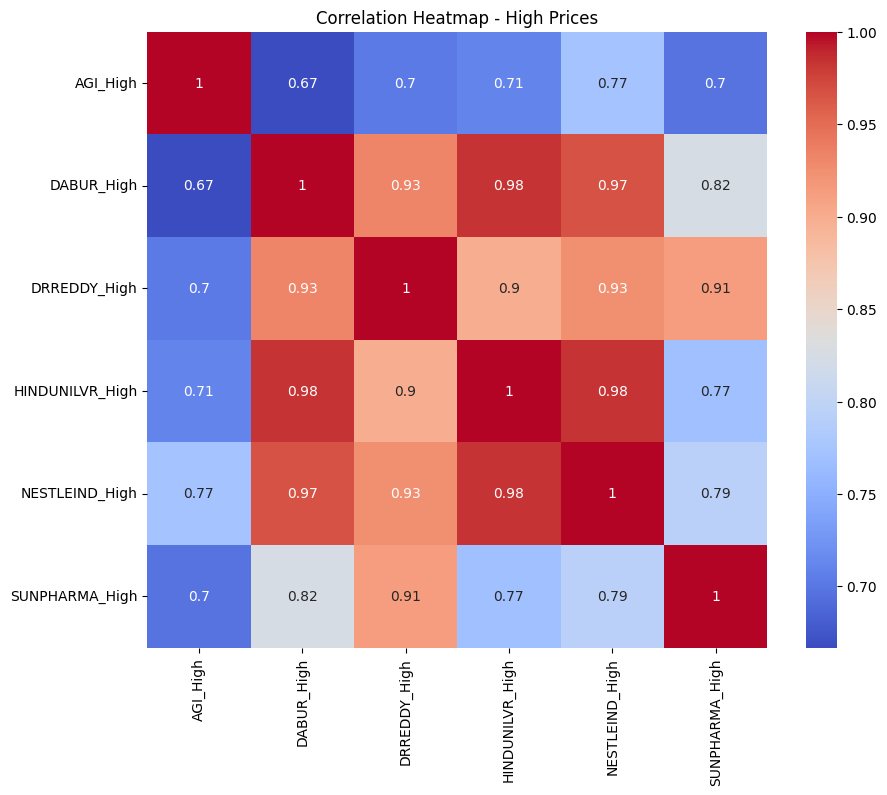

In [10]:
# Filter High columns
high_cols = [col for col in merged_df.columns if 'High' in col]
df_high = merged_df[high_cols]

# Calculate correlation
corr_high = df_high.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_high, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - High Prices')
plt.show()


In [11]:
stocks = ["BALAMINES.NS", "DRREDDY.NS", "AUROPHARMA.NS", "SUNPHARMA.NS",
          "VENKEYS.NS", "WANBURY.NS", "HINDPETRO.NS", "IOC.NS", "ZYDUSLIFE.NS", "HIKAL.NS"]

# Create a DataFrame for each stock
df_balamines = yf.Ticker("BALAMINES.NS").history(period="max")
# df_amnplst = yf.Ticker("AMNPLST.NS").history(period="max")
df_drreddy = yf.Ticker("DRREDDY.NS").history(period="max")
df_auropharma = yf.Ticker("AUROPHARMA.NS").history(period="max")
df_sunpharma = yf.Ticker("SUNPHARMA.NS").history(period="max")
df_venkeys = yf.Ticker("VENKEYS.NS").history(period="max")
df_wanbury = yf.Ticker("WANBURY.NS").history(period="max")
df_hindpetro = yf.Ticker("HINDPETRO.NS").history(period="max")
df_ioc = yf.Ticker("IOC.NS").history(period="max")
df_zyduslife = yf.Ticker("ZYDUSLIFE.NS").history(period="max")
df_hikal = yf.Ticker("HIKAL.NS").history(period="max")


In [12]:
# Extracting the first and last index from each DataFrame
start_dates = [df.index[0] for df in [df_balamines, df_drreddy, df_auropharma, df_sunpharma, 
                                      df_venkeys, df_wanbury, df_hindpetro, df_ioc, df_zyduslife, df_hikal]]
end_dates = [df.index[-1] for df in [df_balamines, df_drreddy, df_auropharma, df_sunpharma, 
                                     df_venkeys, df_wanbury, df_hindpetro, df_ioc, df_zyduslife, df_hikal]]

# Finding the latest start date and the earliest end date
latest_start_date = max(start_dates)
earliest_end_date = min(end_dates)

print(f"Latest common start date: {latest_start_date}")
print(f"Earliest common end date: {earliest_end_date}")


Latest common start date: 2007-04-05 00:00:00+05:30
Earliest common end date: 2023-12-21 00:00:00+05:30


In [13]:
# Filter each DataFrame for the common date range
df_balamines_filtered = df_balamines.loc[latest_start_date:earliest_end_date]
df_drreddy_filtered = df_drreddy.loc[latest_start_date:earliest_end_date]
df_auropharma_filtered = df_auropharma.loc[latest_start_date:earliest_end_date]
df_sunpharma_filtered = df_sunpharma.loc[latest_start_date:earliest_end_date]
df_venkeys_filtered = df_venkeys.loc[latest_start_date:earliest_end_date]
df_wanbury_filtered = df_wanbury.loc[latest_start_date:earliest_end_date]
df_hindpetro_filtered = df_hindpetro.loc[latest_start_date:earliest_end_date]
df_ioc_filtered = df_ioc.loc[latest_start_date:earliest_end_date]
df_zyduslife_filtered = df_zyduslife.loc[latest_start_date:earliest_end_date]
df_hikal_filtered = df_hikal.loc[latest_start_date:earliest_end_date]


In [14]:
# Renaming columns for merging
df_balamines_filtered.columns = [f"BALAMINES_{col}" for col in df_balamines_filtered.columns]
# df_amnplst_filtered.columns = [f"AMNPLST_{col}" for col in df_amnplst_filtered.columns]
df_drreddy_filtered.columns = [f"DRREDDY_{col}" for col in df_drreddy_filtered.columns]
df_auropharma_filtered.columns = [f"AUROPHARMA_{col}" for col in df_auropharma_filtered.columns]
df_sunpharma_filtered.columns = [f"SUNPHARMA_{col}" for col in df_sunpharma_filtered.columns]
df_venkeys_filtered.columns = [f"VENKEYS_{col}" for col in df_venkeys_filtered.columns]
df_wanbury_filtered.columns = [f"WANBURY_{col}" for col in df_wanbury_filtered.columns]
df_hindpetro_filtered.columns = [f"HINDPETRO_{col}" for col in df_hindpetro_filtered.columns]
df_ioc_filtered.columns = [f"IOC_{col}" for col in df_ioc_filtered.columns]
df_zyduslife_filtered.columns = [f"ZYDUSLIFE_{col}" for col in df_zyduslife_filtered.columns]
df_hikal_filtered.columns = [f"HIKAL_{col}" for col in df_hikal_filtered.columns]

# Merging all dataframes on the Date index
merged_df = pd.concat([df_balamines_filtered, df_drreddy_filtered, 
                       df_auropharma_filtered, df_sunpharma_filtered, df_venkeys_filtered, 
                       df_wanbury_filtered, df_hindpetro_filtered, df_ioc_filtered, 
                       df_zyduslife_filtered, df_hikal_filtered], axis=1)

merged_df.head()  # Displaying the first few rows of the merged dataframe


,BALAMINES_Open,BALAMINES_High,BALAMINES_Low,BALAMINES_Close,BALAMINES_Volume,BALAMINES_Dividends,BALAMINES_Stock Splits,DRREDDY_Open,DRREDDY_High,DRREDDY_Low,...,ZYDUSLIFE_Volume,ZYDUSLIFE_Dividends,ZYDUSLIFE_Stock Splits,HIKAL_Open,HIKAL_High,HIKAL_Low,HIKAL_Close,HIKAL_Volume,HIKAL_Dividends,HIKAL_Stock Splits
Date,,,,,,,,,,,,,,,,,,,,,
2007-04-05 00:00:00+05:30,24.446354,24.613909,23.549932,23.809643,6930.0,0.0,0.0,659.921291,661.681081,638.979799,...,120343,0.0,0.0,43.132680,44.035181,41.685274,43.768402,25665,0.0,0.0
2007-04-09 00:00:00+05:30,24.463109,24.965775,23.642086,24.965775,1215.0,0.0,0.0,643.203110,647.602584,638.363689,...,218472,0.0,0.0,43.365409,45.408803,43.365409,44.733349,11572,0.0,0.0
2007-04-10 00:00:00+05:30,24.965775,24.965775,24.965775,24.965775,0.0,0.0,0.0,641.443463,643.995180,629.652848,...,79168,0.0,0.0,46.055883,46.055883,43.791119,44.273586,7867,0.0,0.0
2007-04-11 00:00:00+05:30,24.965777,24.965777,24.362577,24.362577,750.0,0.0,0.0,630.048785,634.404275,612.406901,...,79548,0.0,0.0,44.387106,44.387106,43.365410,43.484608,16552,0.0,0.0
2007-04-12 00:00:00+05:30,25.300890,25.300890,25.300890,25.300890,100.0,0.0,0.0,615.530605,624.109582,602.728142,...,125692,0.0,0.0,44.262230,44.443865,42.684271,43.433517,1935,0.0,0.0


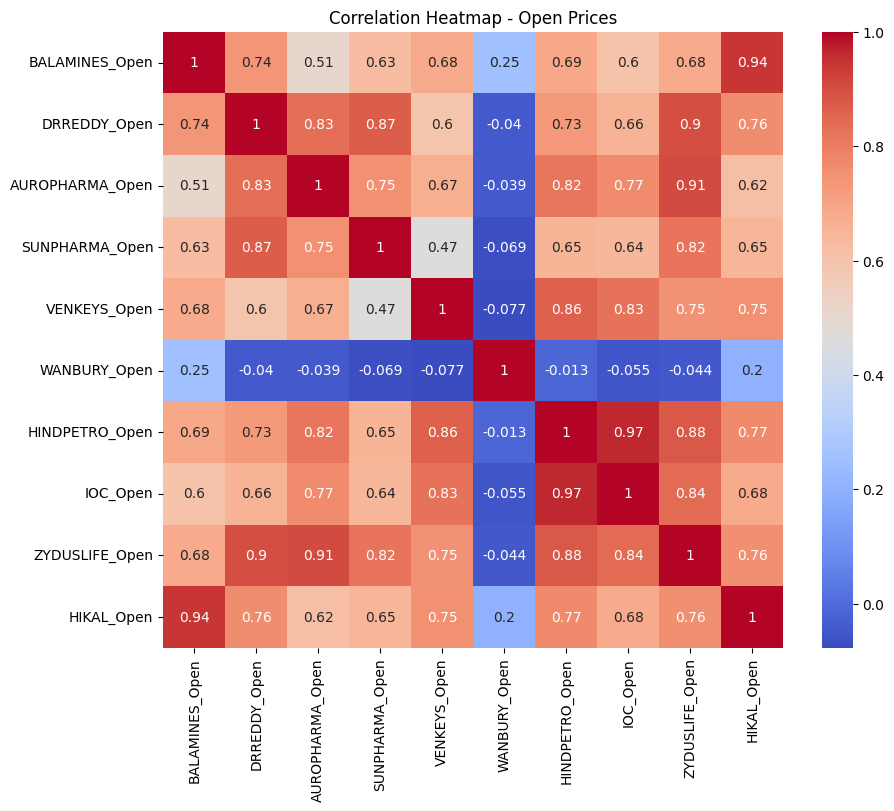

In [15]:
# Filter Open columns
open_cols = [col for col in merged_df.columns if 'Open' in col]
df_open = merged_df[open_cols]

# Calculate correlation
corr_open = df_open.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_open, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Open Prices')
plt.show()


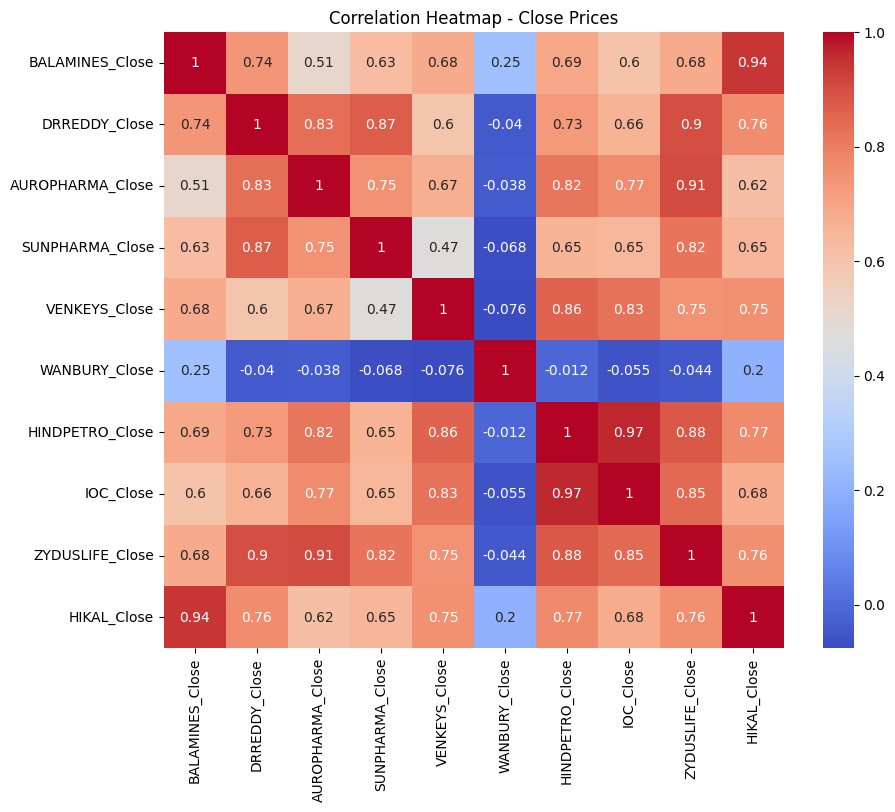

In [16]:
# Filter Close columns
close_cols = [col for col in merged_df.columns if 'Close' in col]
df_close = merged_df[close_cols]

# Calculate correlation
corr_close = df_close.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_close, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Close Prices')
plt.show()


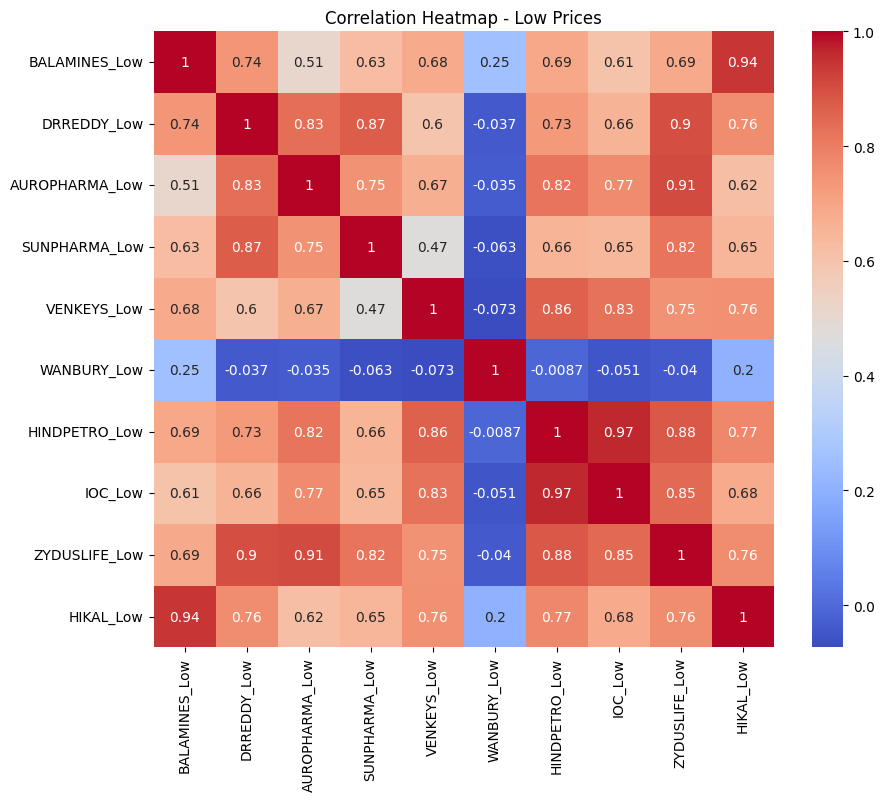

In [17]:
# Filter Low columns
low_cols = [col for col in merged_df.columns if 'Low' in col]
df_low = merged_df[low_cols]

# Calculate correlation
corr_low = df_low.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_low, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Low Prices')
plt.show()

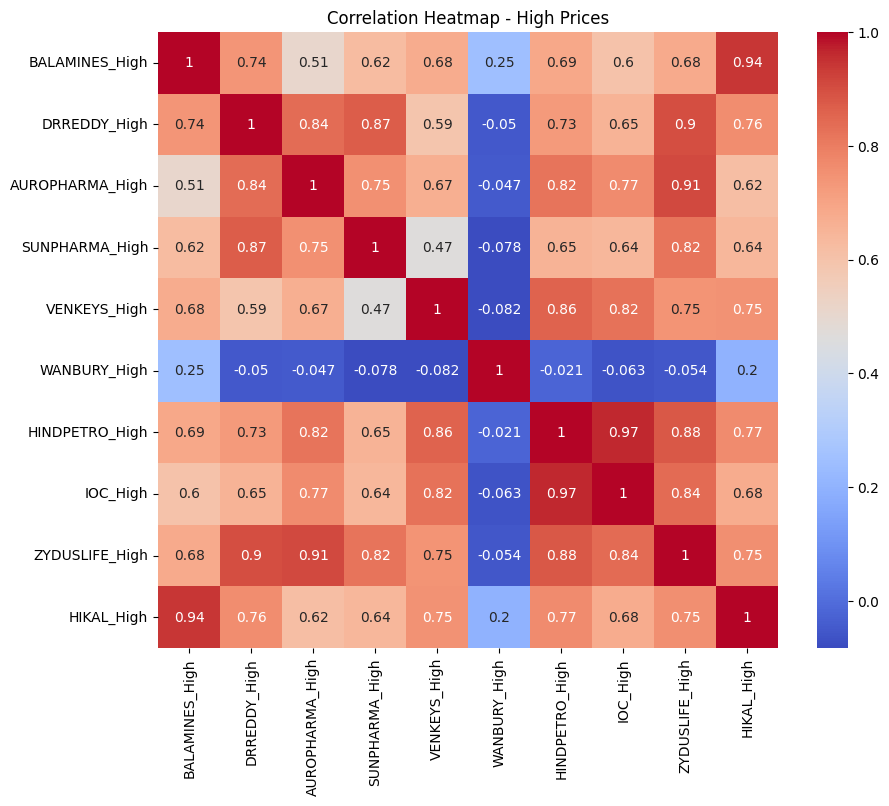

In [18]:
# Filter High columns
high_cols = [col for col in merged_df.columns if 'High' in col]
df_high = merged_df[high_cols]

# Calculate correlation
corr_high = df_high.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_high, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - High Prices')
plt.show()

In [21]:
# New stock symbols
stocks = ["CAMS.NS", "HDFCAMC.NS", "ABCAPITAL.NS"]

# Create a DataFrame for each new stock
df_cams = yf.Ticker("CAMS.NS").history(period="max")
df_hdfcamc = yf.Ticker("HDFCAMC.NS").history(period="max")
df_abcapital = yf.Ticker("ABCAPITAL.NS").history(period="max")


In [22]:
# Extracting the first and last index from each DataFrame
start_dates = [df.index[0] for df in [df_balamines, df_drreddy, df_auropharma, df_sunpharma, 
                                      df_venkeys, df_wanbury, df_hindpetro, df_ioc, df_zyduslife, df_hikal]]
end_dates = [df.index[-1] for df in [df_balamines, df_drreddy, df_auropharma, df_sunpharma, 
                                     df_venkeys, df_wanbury, df_hindpetro, df_ioc, df_zyduslife, df_hikal]]

# Finding the latest start date and the earliest end date
latest_start_date = max(start_dates)
earliest_end_date = min(end_dates)

print(f"Latest common start date: {latest_start_date}")
print(f"Earliest common end date: {earliest_end_date}")

Latest common start date: 2007-04-05 00:00:00+05:30
Earliest common end date: 2023-12-21 00:00:00+05:30


In [23]:
# Filter each DataFrame for the common date range
df_cams_filtered = df_cams.loc[latest_start_date:earliest_end_date]
df_hdfcamc_filtered = df_hdfcamc.loc[latest_start_date:earliest_end_date]
df_abcapital_filtered = df_abcapital.loc[latest_start_date:earliest_end_date]

In [29]:
# Renaming columns for merging
df_cams_filtered.columns = [f"CAMS_{col}" for col in df_cams_filtered.columns]
df_hdfcamc_filtered.columns = [f"HDFCAMC_{col}" for col in df_hdfcamc_filtered.columns]
df_abcapital_filtered.columns = [f"ABCAPITAL_{col}" for col in df_abcapital_filtered.columns]

# Merging the new dataframes on the Date index
merged_df = pd.concat([df_cams_filtered, df_hdfcamc_filtered, df_abcapital_filtered], axis=1)

merged_df.head()  # Displaying the first few rows of the merged dataframe

,CAMS_CAMS_Open,CAMS_CAMS_High,CAMS_CAMS_Low,CAMS_CAMS_Close,CAMS_CAMS_Volume,CAMS_CAMS_Dividends,CAMS_CAMS_Stock Splits,HDFCAMC_HDFCAMC_Open,HDFCAMC_HDFCAMC_High,HDFCAMC_HDFCAMC_Low,...,HDFCAMC_HDFCAMC_Volume,HDFCAMC_HDFCAMC_Dividends,HDFCAMC_HDFCAMC_Stock Splits,ABCAPITAL_ABCAPITAL_Open,ABCAPITAL_ABCAPITAL_High,ABCAPITAL_ABCAPITAL_Low,ABCAPITAL_ABCAPITAL_Close,ABCAPITAL_ABCAPITAL_Volume,ABCAPITAL_ABCAPITAL_Dividends,ABCAPITAL_ABCAPITAL_Stock Splits
Date,,,,,,,,,,,,,,,,,,,,,
2017-09-01 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,250.000000,255.000000,237.500000,237.500000,4658997,0.0,0.0
2017-09-04 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,225.649994,225.649994,225.649994,225.649994,309923,0.0,0.0
2017-09-05 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,214.399994,214.399994,214.399994,214.399994,192377,0.0,0.0
2017-09-06 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,203.699997,203.699997,203.699997,203.699997,267160,0.0,0.0
2017-09-07 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,193.550003,213.850006,193.550003,206.949997,34241770,0.0,0.0


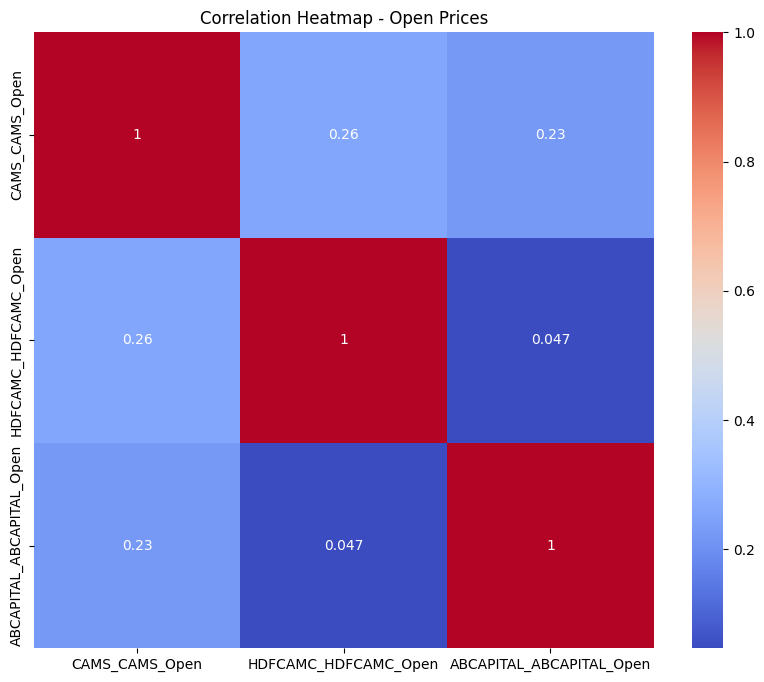

In [30]:
# Filter Open columns
open_cols = [col for col in merged_df.columns if 'Open' in col]
df_open = merged_df[open_cols]

# Calculate correlation
corr_open = df_open.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_open, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Open Prices')
plt.show()


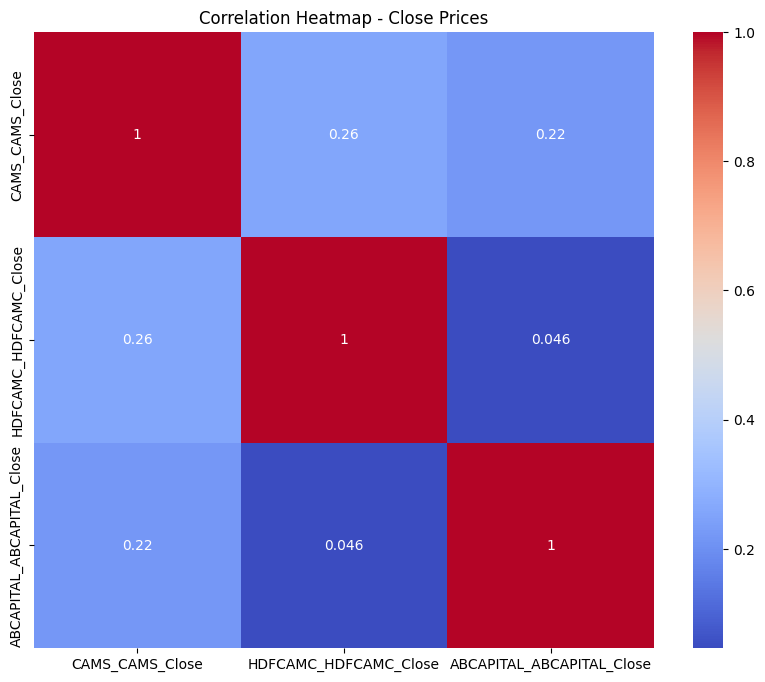

In [31]:
# Filter Close columns
close_cols = [col for col in merged_df.columns if 'Close' in col]
df_close = merged_df[close_cols]

# Calculate correlation
corr_close = df_close.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_close, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Close Prices')
plt.show()


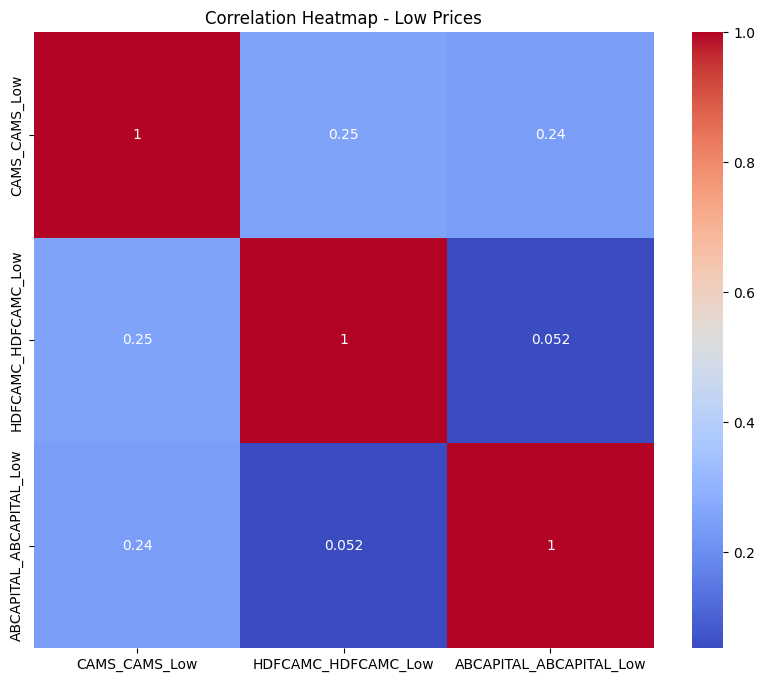

In [32]:
# Filter Low columns
low_cols = [col for col in merged_df.columns if 'Low' in col]
df_low = merged_df[low_cols]

# Calculate correlation
corr_low = df_low.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_low, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Low Prices')
plt.show()

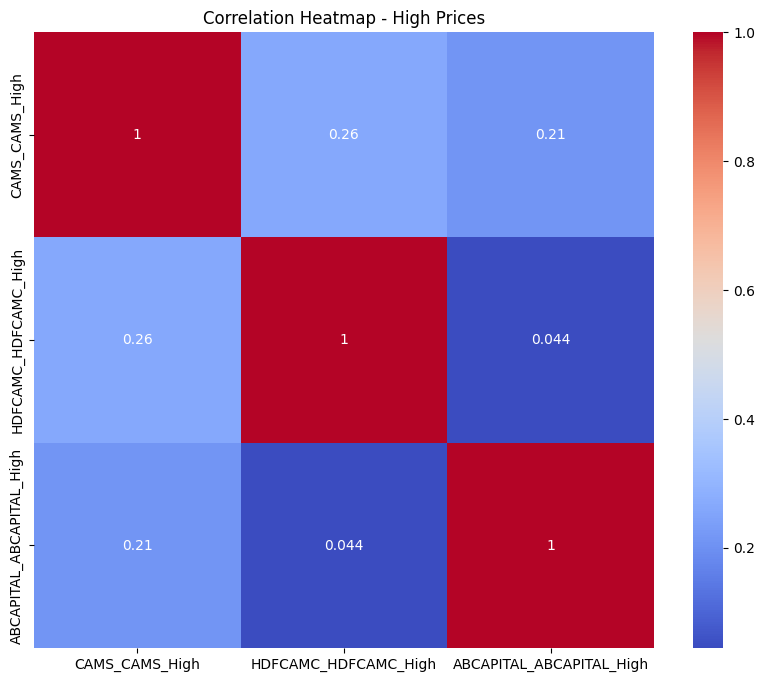

In [33]:
# Filter High columns
high_cols = [col for col in merged_df.columns if 'High' in col]
df_high = merged_df[high_cols]

# Calculate correlation
corr_high = df_high.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_high, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - High Prices')
plt.show()